<a href="https://colab.research.google.com/github/saghar-trade/deep-learning/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:

!pip install keras

In [49]:
!pip install tensorflow

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import utils, layers,optimizers,losses, models
import matplotlib.pyplot as plt
import numpy as np




In [52]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

In [53]:
#در کانولوشنال نیاز نیست مسح باشد همان بردار 28 در 28 باقی میماند و چون سیاه سفید است ضرب در 1
# 3ولی اگر رنگی بود بعد سوم عدد

x_train=train_images.reshape(60000,28,28,1)
x_test=test_images.reshape(10000,28,28,1)

In [54]:
#normalizing(0-1)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255


y_train=utils.to_categorical(train_labels)
y_test=utils.to_categorical(test_labels)




print('shape of train_label: ',train_labels[0] )
print('shape of y_train :',y_train[0] )

shape of train_label:  5
shape of y_train : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#**model** **creation**

In [55]:
#در اینجا لایه دنس نمیخوایم نیاز به لایه کانوولوشنی دارم

myInput=layers.Input(shape=(28,28,1))
#number of filters=16, size of filter=3*3 but because height and width are same we can say just 3
#padding='same means outlayer has the same size as input
#stride=2 for reducing size
conv1=layers.Conv2D(16,3, activation='relu',padding='same' ,strides=2)(myInput)
conv2=layers.Conv2D(32,3, activation='relu',padding='same' ,strides=2)(conv1)
flat=layers.Flatten()(conv2)
out_layer=layers.Dense(10, activation='softmax')(flat)
myModel2=models.Model(myInput,out_layer)
myModel2.summary()
myModel2.compile(optimizer=optimizers.SGD(learning_rate=0.001,momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

**TRAIN & EVALUATION**

In [56]:
history=myModel2.fit(x_train,y_train,batch_size=128, epochs=20,validation_split=0.2 )

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3187 - loss: 2.1722 - val_accuracy: 0.8272 - val_loss: 0.6809
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8447 - loss: 0.5676 - val_accuracy: 0.8944 - val_loss: 0.3708
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8850 - loss: 0.3949 - val_accuracy: 0.9050 - val_loss: 0.3291
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8989 - loss: 0.3488 - val_accuracy: 0.9130 - val_loss: 0.3100
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9048 - loss: 0.3260 - val_accuracy: 0.9163 - val_loss: 0.2963
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9111 - loss: 0.3073 - val_accuracy: 0.9207 - val_loss: 0.2778
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9175 - loss: 0.2907 - val_accuracy: 0.9219 - val_loss: 0.2705
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9216 - loss: 0.2754 - val_accu

Text(0, 0.5, 'Loss')

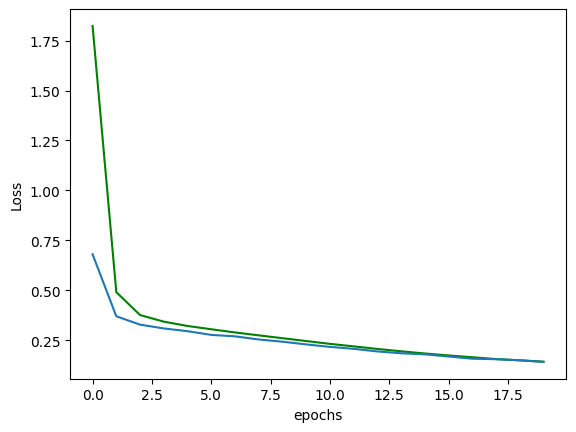

In [59]:
#plot losses
losses=history.history['loss']
val_losses=history.history['val_loss']
plt.plot(losses ,color='g')
plt.plot(val_losses)
plt.xlabel('epochs')
plt.ylabel('Loss')




In [60]:
#evaluation on test data:
test_loss=myModel2.evaluate(x_test,y_test)
print('test loss: ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.1526
test loss:  [0.13246381282806396, 0.9620000123977661]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


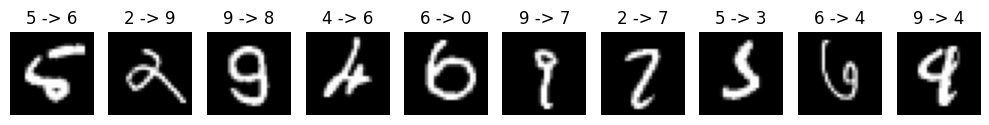

In [62]:
test_labels_p=myModel2.predict(x_test)
test_labels_p=np.argmax(test_labels_p, axis=1)
n=0
f,axs=plt.subplots(1,10,figsize=(10,6))
axs = axs.flatten()
for i in range(len(test_labels)):

  if(test_labels_p[i]!=test_labels[i]):
   axs[n].imshow(test_images[i], cmap='gray')
   axs[n].set_title(f'{test_labels[i]} -> {test_labels_p[i]}')
   axs[n].axis('off')
   n=n+1
  if n>=10 :
    break

plt.tight_layout()
plt.show()

